# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Load The Training Data

In [93]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import numpy as np

In [94]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.datetime = pd.to_datetime(train.datetime)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [115]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.datetime = pd.to_datetime(test.datetime)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [31]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 2: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train.drop(columns=["casual", "registered"]),
    presets="best_quality",
    time_limit=600
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220416_142115\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220416_142115\"
AutoGluon Version:  0.4.0
Python Version:     3.7.4
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1832.96 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identity

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.522805      22.632714  387.815342                0.000998           0.827016            3       True         16
1   NeuralNetFastAI_BAG_L2  -51.598780      21.552267  374.657490                0.761917          48.107196            2       True         15
2   RandomForestMSE_BAG_L2  -53.527283      21.307976  335.176590                0.517627           8.626295            2       True         12
3     ExtraTreesMSE_BAG_L2  -53.695600      21.352172  330.254835                0.561822           3.704540            2       True         14
4          CatBoost_BAG_L2  -55.248652      20.926155  389.063464                0.135806          62.513169            2       True         13
5    KNeighborsDist_BAG_L1  -84.146423       0.111703    0.067854         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927297,
  'KNeighborsDist_BAG_L1': -84.14642264302901

### Create predictions from test dataset

In [17]:
predictions = predictor.predict(test)
predictions.head()

0    24.655628
1    42.134689
2    47.208630
3    48.922523
4    50.866722
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [19]:
predictions_t = test[["datetime"]].copy()
predictions_t["count"] = predictions
predictions = predictions_t

In [20]:
predictions.head()

,datetime,count
0,2011-01-20 00:00:00,24.655628
1,2011-01-20 01:00:00,42.134689
2,2011-01-20 02:00:00,47.208630
3,2011-01-20 03:00:00,48.922523
4,2011-01-20 04:00:00,50.866722


In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,99.618851
std,88.578110
min,-0.991029
25%,20.861637
50%,67.464447
75%,167.903549
max,352.180084


In [23]:
# How many negative values do we have?
len(predictions[predictions["count"] < 0])

9

In [24]:
# Set them to zero
predictions["count"] = predictions["count"].apply(lambda x: 0 if x < 0 else x)

### Set predictions to submission dataframe, save, and submit

In [25]:
submission = predictions
submission.to_csv("submission.csv", index=False)

Initial Score: 1.8197

## Step 3: Exploratory Data Analysis and Creating additional features

First, we expect the data to get an idea of which additional features we could add

In [95]:
# Drop two columns that are not present in the test dataset
train.drop(columns=["casual", "registered"], inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F38B2D3C8>,
      dtype=object)

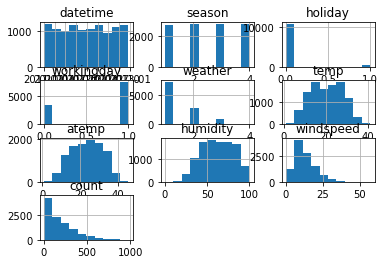

In [96]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploratory data analysis
train.hist()

In [97]:
# take a peek at the data
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


First, we will clean up the date-time related variables into the appropriate categorical & numerical values

In [98]:
# create new datetime related features
# the assumption here is that there are some fixed effects related to year, month & day of the week
train["year"] = train["datetime"].dt.year.astype("category")
train["month"] = train["datetime"].dt.month.astype("category")
train["day_of_week"] = train["datetime"].dt.day_of_week.astype("category")

# next to this we take into account the hour of the day as intuitively there is more demand
# during certain hours
train["hour_of_day"] = train["datetime"].dt.hour

# drop the original datetime feature
train.drop(columns=["datetime"], inplace=True)

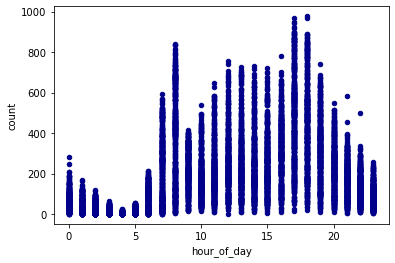

In [99]:
# plot the relation between hour of day & count to identify the relation & potential peak hours
train.plot.scatter(x="hour_of_day", y="count", c="DarkBlue")

In [100]:
# shift the hour of day variable so that the relation between hour of day & count is cleaner
train["hour_of_day"] = train["hour_of_day"].apply(lambda x: x+24 if x < 4 else x)

Next, we will also take a look at potential peak-hour relationships

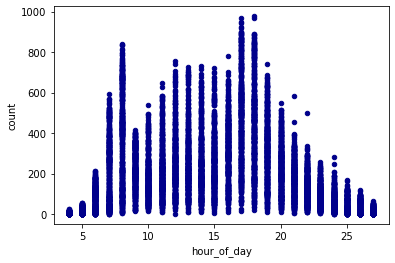

In [101]:
# plot the relation between hour of day & count to identify the relation & potential peak hours
train.plot.scatter(x="hour_of_day", y="count", c="DarkBlue")

7, 8 -> there seem to be morning peak hours around these values

17, 18 -> there seem to be evening peak hours around these values

Let's see if this relationship also holds on the weekend and/or on holidays

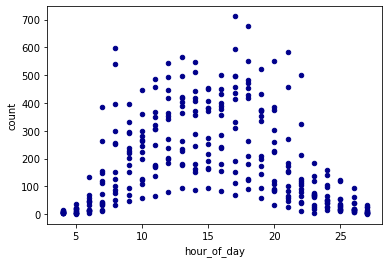

In [102]:
# plot the relation between hour of day & count to identify the relation & potential peak hours
train[train.holiday == 1].plot.scatter(x="hour_of_day", y="count", c="DarkBlue")

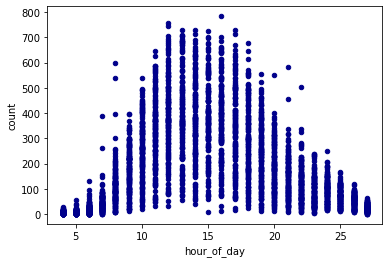

In [103]:
# plot the relation between hour of day & count to identify the relation & potential peak hours
train[train.workingday == 0].plot.scatter(x="hour_of_day", y="count", c="DarkBlue")

The relationship does not seem to hold on the weekend, nor on holidays. Therefore, we will just create two additional dummy variables to present non-holiday, working day peak hours

In [104]:
# Create dummies for the respective peak hours
train["work_day_morning_peak"] = train[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 7 <= x[2] <= 8 else 0,
    axis=1
)
train["work_day_evening_peak"] = train[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 17 <= x[2] <= 18 else 0,
    axis=1
)

Next to the date-time related variables, we will also clean up the distribution of the windspeed & count variables

In [105]:
# based on the histograms -> log-transform windspeed & count
train["windspeed"] = train["windspeed"].apply(lambda x: np.log10(x+1)) # we have to add 1 as windspeed can be 0 in some occasions
train["count"] = train["count"].apply(lambda x: np.log10(x))

Finally, there are a few remaining variables that should be categorical rather than normal numbers

In [106]:
# Change season & weather to category variables
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

In [107]:
# View all new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day_of_week,hour_of_day,work_day_morning_peak,work_day_evening_peak
0,1,0,0,1,9.84,14.395,81,0.0,1.204120,2011,1,5,24,0,0
1,1,0,0,1,9.02,13.635,80,0.0,1.602060,2011,1,5,25,0,0
2,1,0,0,1,9.02,13.635,80,0.0,1.505150,2011,1,5,26,0,0
3,1,0,0,1,9.84,14.395,75,0.0,1.113943,2011,1,5,27,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0.000000,2011,1,5,4,0,0


In [108]:
# describe the new training set
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour_of_day,work_day_morning_peak,work_day_evening_peak
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,1.010774,1.977152,15.487966,0.056954,0.057138
std,0.166599,0.466159,7.79159,8.474601,19.245033,0.415306,0.646683,6.895892,0.231765,0.232116
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,0.903171,1.623249,10.000000,0.000000,0.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,1.146066,2.161368,15.000000,0.000000,0.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,1.255222,2.453318,21.000000,0.000000,0.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,1.763405,2.989895,27.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F390E1E08>,
      dtype=object)

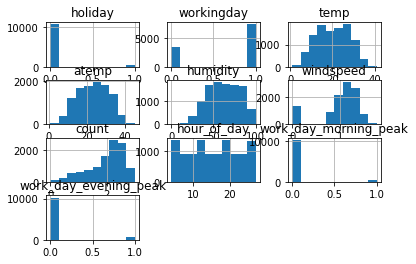

In [109]:
# View histogram of all features again with the new features
train.hist()

We end by scaling the data

In [120]:
# Before tuning some hyper parameters, we will also normalize the numerical columns of our training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]].to_numpy())
train[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]] = scaler.transform(train[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]].to_numpy())

## Step 4: Rerun the model with the same settings as before, just with more features

In [136]:
predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train,
    presets="best_quality",
    time_limit=600
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220416_172342\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220416_172342\"
AutoGluon Version:  0.4.0
Python Version:     3.7.4
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1448.66 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identit

In [137]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -0.130410       6.355933  449.652314                0.000990           0.485015            3       True         17
1      WeightedEnsemble_L2  -0.130818       1.237371  291.550419                0.001995           1.314508            2       True          9
2     ExtraTreesMSE_BAG_L2  -0.132073       3.124841  359.323777                0.826354           2.885622            2       True         13
3          CatBoost_BAG_L1  -0.132434       0.746966  285.972330                0.746966         285.972330            1       True          6
4          LightGBM_BAG_L2  -0.132727       2.544751  362.822838                0.246264           6.384682            2       True         11
5   NeuralNetFastAI_BAG_L2  -0.132853       3.135802  396.282707                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_

In [116]:
# Prepare the test data with the same cleanings & feature engineering that we applied to the training data
# create new datetime related features
# the assumption here is that there are some fixed effects related to year, month & day of the week
test["year"] = test["datetime"].dt.year.astype("category")
test["month"] = test["datetime"].dt.month.astype("category")
test["day_of_week"] = test["datetime"].dt.day_of_week.astype("category")

# next to this we take into account the hour of the day as intuitively there is more demand
# during certain hours
test["hour_of_day"] = test["datetime"].dt.hour

# drop the original datetime feature
# save the datetimes for the submission first
submission_new_features = test[["datetime"]].copy()
test.drop(columns=["datetime"], inplace=True)

# apply the hour of day shifts
test["hour_of_day"] = test["hour_of_day"].apply(lambda x: x+24 if x < 4 else x)

# Create dummies for the respective peak hours
test["work_day_morning_peak"] = test[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 7 <= x[2] <= 8 else 0,
    axis=1
)
test["work_day_evening_peak"] = test[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 17 <= x[2] <= 18 else 0,
    axis=1
)

# based on the histograms -> log-transform windspeed & count
test["windspeed"] = test["windspeed"].apply(lambda x: np.log10(x+1)) # we have to add 1 as windspeed can be 0 in some occasions

# Change season & weather to category variables
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [122]:
# Also scale the test data with the same scaler settings
test[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]] = scaler.transform(test[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]].to_numpy())

In [138]:
# predict using the new model
predictions = predictor_new_features.predict(test)

In [139]:
# Same submitting predictions
submission_new_features["count"] = predictions
# Since we applied a log transformation, we need to apply the reverse transformation on the output
submission_new_features["count"] = submission_new_features["count"].apply(lambda x: np.power(10, x))
# Finally, we remove 0 values
submission_new_features["count"] = submission_new_features["count"].apply(lambda x: 0 if x < 0 else x)

# Save the results to a new csv file
submission_new_features.to_csv("submission_new_features.csv", index=False)

New score: 0.38512

## Step 5: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [123]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour_of_day,work_day_morning_peak,work_day_evening_peak
count,10886.000000,10886.000000,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,10886.000000,1.088600e+04,10886.000000,10886.000000
mean,0.028569,0.680875,1.036139e-14,-3.990153e-15,-1.667583e-15,-2.003441e-15,1.977152,3.079987e-17,0.056954,0.057138
std,0.166599,0.466159,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,0.646683,1.000046e+00,0.231765,0.232116
min,0.000000,0.000000,-2.491372e+00,-2.701736e+00,-3.215858e+00,-2.433920e+00,0.000000,-1.665991e+00,0.000000,0.000000
25%,0.000000,0.000000,-8.074281e-01,-8.248654e-01,-7.735577e-01,-2.591049e-01,1.623249,-7.958678e-01,0.000000,0.000000
50%,0.000000,1.000000,3.454398e-02,6.902305e-02,5.899992e-03,3.257793e-01,2.161368,-7.076512e-02,0.000000,0.000000
75%,0.000000,1.000000,7.712696e-01,8.738177e-01,7.853577e-01,5.886239e-01,2.453318,7.993581e-01,0.000000,0.000000
max,1.000000,1.000000,2.665707e+00,2.572501e+00,1.980526e+00,1.812316e+00,2.989895,1.669481e+00,1.000000,1.000000


Here we chose to only change some of the high-level parameters from AutoGluon itself. Specifically, we exclude some models that did not show up in the best models before, enable automatic stacking, and increase the time limit.

In [125]:
predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train,
    presets="best_quality",
    time_limit=1200, # increase training time to 20 min
    auto_stack=True,
    hyperparameters={
        "GBM": {},
        "CAT": {},
        "XGB": {},
        "FASTAI": {},
        "RF": {},
        "XT": {}
    }, # exclude models that didn't perform well
    hyperparameter_tune_kwargs="auto"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220416_164931\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20220416_164931\"
AutoGluon Version:  0.4.0
Python Version:     3.7.4
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1007.5 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identit

[1000]	valid_set's rmse: 0.134998
[1000]	valid_set's rmse: 0.133741
[1000]	valid_set's rmse: 0.141596


	Ran out of time, early stopping on iteration 1358. Best iteration is:
	[1358]	valid_set's rmse: 0.138379
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1\T1 ...
	-0.1346	 = Validation score   (root_mean_squared_error)
	2.96s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T2 ...
	-0.1367	 = Validation score   (root_mean_squared_error)
	1.78s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T3 ...
	-0.1336	 = Validation score   (root_mean_squared_error)
	2.63s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T4 ...
	-0.1384	 = Validation score   (root_mean_squared_error)
	4.54s	 = Training   runtime
	0.12s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L1 ... Tuning model for up to 14.99s of the 1183.86s of remaining time.
	No hyperparameter search space specified for RandomForest. Skipping HPO. Will train one model based on the provided hyperparamete

In [126]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          CatBoost_BAG_L2\T1  -0.127174      33.547572  610.706014                0.008977           5.791281            2       True         18
1         WeightedEnsemble_L2  -0.128043       7.572105  522.492655                0.001995           0.983880            2       True         12
2         WeightedEnsemble_L3  -0.128135      35.787561  703.382463                0.000998           0.466392            3       True         23
3   NeuralNetFastAI_BAG_L2\T1  -0.129233      34.255893  652.872191                0.717298          47.957458            2       True         20
4        ExtraTrees_BAG_L2\T1  -0.129807      34.125758  608.312786                0.587163           3.398053            2       True         19
5          LightGBM_BAG_L2\T1  -0.130158      33.858021  611.7

{'model_types': {'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T4': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1\\T1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1\\T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L1\\T1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1\\T1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1\\T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T3': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T4': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2\\T1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2\\T1': 'StackerEnsembleModel_

In [127]:
# predict using the new model
predictions = predictor_new_hpo.predict(test)

In [128]:
# take the datetimes from the previous predictions
submission_new_hpo = submission_new_features[["datetime"]].copy()
# Same submitting predictions
submission_new_hpo["count"] = predictions
# Since we applied a log transformation, we need to apply the reverse transformation on the output
submission_new_hpo["count"] = submission_new_hpo["count"].apply(lambda x: np.power(10, x))
# Finally, we remove 0 values
submission_new_hpo["count"] = submission_new_hpo["count"].apply(lambda x: 0 if x < 0 else x)

# Save the results to a new csv file
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

New score: 0.39251

## Step 6: Separate Predictions for Casual and Registered Counts

In a final attempt to improve the model, we utilize the fact that there might be different drivers behind casual & registered users. Therefore, we will predict three models on the different counts and then aggregate them in the end.

First, we reload the train & test data

In [154]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.datetime = pd.to_datetime(train.datetime)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [155]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.datetime = pd.to_datetime(test.datetime)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Then, we clean both the train & test data as before

In [156]:
# Prepare the test data with the same cleanings & feature engineering that we applied to the training data
# create new datetime related features
# the assumption here is that there are some fixed effects related to year, month & day of the week
train["year"] = train["datetime"].dt.year.astype("category")
train["month"] = train["datetime"].dt.month.astype("category")
train["day_of_week"] = train["datetime"].dt.day_of_week.astype("category")

# next to this we take into account the hour of the day as intuitively there is more demand
# during certain hours
train["hour_of_day"] = train["datetime"].dt.hour

# drop the original datetime feature
# save the datetimes for the submission first
train.drop(columns=["datetime"], inplace=True)

# apply the hour of day shifts
train["hour_of_day"] = train["hour_of_day"].apply(lambda x: x+24 if x < 4 else x)

# Create dummies for the respective peak hours
train["work_day_morning_peak"] = train[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 7 <= x[2] <= 8 else 0,
    axis=1
)
train["work_day_evening_peak"] = train[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 17 <= x[2] <= 18 else 0,
    axis=1
)

# based on the histograms -> log-transform windspeed & count
train["windspeed"] = train["windspeed"].apply(lambda x: np.log10(x+1)) # we have to add 1 as windspeed can be 0 in some occasions

# casual or registerd can be <0, count cannot
train["casual"] = train["casual"].apply(lambda x: np.log10(x+1))
train["registered"] = train["registered"].apply(lambda x: np.log10(x+1))
train["count"] = train["count"].apply(lambda x: np.log10(x))

# Change season & weather to category variables
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

In [157]:
# Before tuning some hyper parameters, we will also normalize the numerical columns of our training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]].to_numpy())
train[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]] = scaler.transform(train[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]].to_numpy())

In [158]:
# Prepare the test data with the same cleanings & feature engineering that we applied to the training data
# create new datetime related features
# the assumption here is that there are some fixed effects related to year, month & day of the week
test["year"] = test["datetime"].dt.year.astype("category")
test["month"] = test["datetime"].dt.month.astype("category")
test["day_of_week"] = test["datetime"].dt.day_of_week.astype("category")

# next to this we take into account the hour of the day as intuitively there is more demand
# during certain hours
test["hour_of_day"] = test["datetime"].dt.hour

# drop the original datetime feature
# save the datetimes for the submission first
submission_new_features_separate = test[["datetime"]].copy()
test.drop(columns=["datetime"], inplace=True)

# apply the hour of day shifts
test["hour_of_day"] = test["hour_of_day"].apply(lambda x: x+24 if x < 4 else x)

# Create dummies for the respective peak hours
test["work_day_morning_peak"] = test[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 7 <= x[2] <= 8 else 0,
    axis=1
)
test["work_day_evening_peak"] = test[["holiday", "workingday", "hour_of_day"]].apply(
    lambda x: 1 if x[0] == 0 and x[1] == 1 and 17 <= x[2] <= 18 else 0,
    axis=1
)

# based on the histograms -> log-transform windspeed & count
test["windspeed"] = test["windspeed"].apply(lambda x: np.log10(x+1)) # we have to add 1 as windspeed can be 0 in some occasions

# Change season & weather to category variables
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [159]:
# Also scale the test data with the same scaler settings
test[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]] = scaler.transform(test[["temp", "atemp", "humidity", "windspeed", "hour_of_day"]].to_numpy())

Finally, we train 3 models:

- one based on "count"
- one based on "registered"
- one based on "casual"

The final prediction would then be: (count + regular + casual) / 2

In [162]:
predictor_new_features_count = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train.drop(columns=["registered", "casual"]),
    presets="best_quality",
    time_limit=600
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220416_181227\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220416_181227\"
AutoGluon Version:  0.4.0
Python Version:     3.7.4
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2163.2 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identity

In [163]:
predictor_new_features_registered = TabularPredictor(
    label="registered",
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train.drop(columns=["count", "casual"]),
    presets="best_quality",
    time_limit=600
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220416_182241\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220416_182241\"
AutoGluon Version:  0.4.0
Python Version:     3.7.4
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 14
Label Column: registered
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2331.29 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Id

In [164]:
predictor_new_features_casual = TabularPredictor(
    label="casual",
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train.drop(columns=["registered", "count"]),
    presets="best_quality",
    time_limit=600
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220416_183254\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220416_183254\"
AutoGluon Version:  0.4.0
Python Version:     3.7.4
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 14
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2538.2 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identit

In [165]:
predictor_new_features_count.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -0.127508      11.542582  488.041369                0.001996           0.410899            3       True         17
1      WeightedEnsemble_L2  -0.127927       8.307076  339.459630                0.000997           0.631812            2       True         10
2     ExtraTreesMSE_BAG_L2  -0.128494       9.519952  345.910278                0.632308           3.607469            2       True         15
3          CatBoost_BAG_L2  -0.128876       9.128028  442.711190                0.240384         100.408380            2       True         14
4   NeuralNetFastAI_BAG_L2  -0.129858       9.604732  366.802365                0.717088          24.499556            2       True         16
5          LightGBM_BAG_L2  -0.129977       9.124015  348.340672                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.32321560338

In [166]:
predictor_new_features_registered.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -0.112930      10.114973  484.740837                0.001994           0.633308            3       True         17
1      WeightedEnsemble_L2  -0.113359       8.034401  308.187099                0.001028           0.739057            2       True         10
2          CatBoost_BAG_L2  -0.113922       8.927000  425.873644                0.140625          78.030651            2       True         14
3     ExtraTreesMSE_BAG_L2  -0.113994       9.332956  351.263161                0.546581           3.420168            2       True         15
4          LightGBM_BAG_L2  -0.114141       9.032712  353.201672                0.246337           5.358679            2       True         12
5        LightGBMXT_BAG_L2  -0.115657       9.238168  353.200673                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.31373373913

In [167]:
predictor_new_features_casual.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -0.192115       6.354141  167.390405                0.000997           0.435803            2       True         11
1      WeightedEnsemble_L3  -0.192572      10.032367  282.879290                0.000997           0.541551            3       True         19
2          LightGBM_BAG_L2  -0.193910       7.476145  175.576251                0.344073           5.203097            2       True         13
3     ExtraTreesMSE_BAG_L2  -0.194460       7.578908  173.336854                0.446836           2.963700            2       True         15
4        LightGBMXT_BAG_L2  -0.194566       7.438255  175.770728                0.306183           5.397574            2       True         12
5           XGBoost_BAG_L2  -0.194585       7.376420  178.274485                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembl

In [185]:
# predict using the new model
predictions_1 = predictor_new_features_count.predict(test)
predictions_2 = predictor_new_features_registered.predict(test)
predictions_3 = predictor_new_features_casual.predict(test)

# apply right transformations based on how we changed the target values for the training
predictions = np.power(10, predictions_1) + np.power(10, predictions_2) - 1 + np.power(10, predictions_3) - 1
predictions = predictions / 2

In [186]:
# Same submitting predictions
submission_new_features_separate["count"] = predictions

# Finally, we remove 0 values
submission_new_features_separate["count"] = submission_new_features_separate["count"].apply(lambda x: 0 if x < 0 else x)

# Save the results to a new csv file
submission_new_features_separate.to_csv("submission_new_features_separate.csv", index=False)

New score: 0.38823

In [187]:
# predict using the new model
predictions = np.power(10, predictions_2) - 1 + np.power(10, predictions_3) - 1

In [188]:
# Same submitting predictions
submission_new_features_separate["count"] = predictions

# Finally, we remove 0 values
submission_new_features_separate["count"] = submission_new_features_separate["count"].apply(lambda x: 0 if x < 0 else x)

# Save the results to a new csv file
submission_new_features_separate.to_csv("submission_new_features_separate_no_all_count.csv", index=False)

New score: 0.38838

Neither of these separate predictions seem to improve the overall Kaggle score, at least not when the model is just taken as is. Perhaps there are some separate effects at play that need to be investigated further.

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

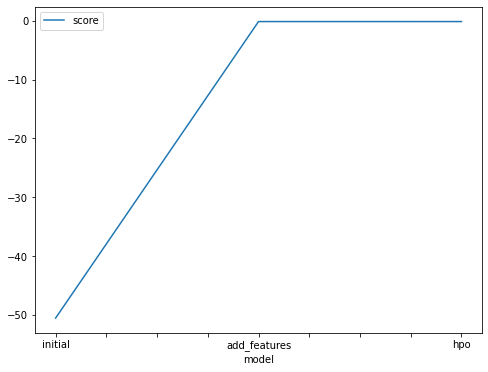

In [130]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-50.522805, -0.129765, -0.127174]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

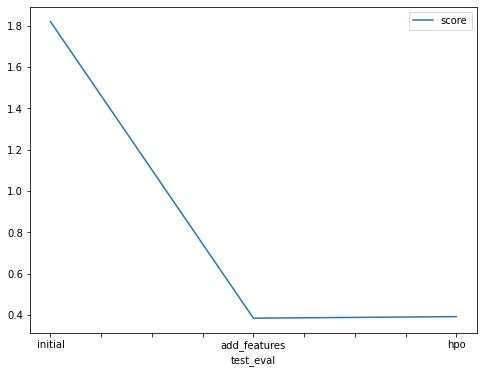

In [142]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.8197, 0.38512, 0.39251]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [143]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["presets=\"best_quality\"", "presets=\"best_quality\"", "presets=\"best_quality\""],
    "hpo2": ["time_limit=600", "time_limit=600", "time_limit=1200"],
    "hpo3": ["", "", "auto_stack=True"],
    "hpo4": ["", "", "hyperparameter_tune_kwargs=\"default\""],
    "hpo5": ["", "", "hyperparameters={\"GBM\": {}, \"CAT\": {}, \"XGB\": {}, \"FASTAI\": {}, \"RF\": {}, \"XT\": {}}"],
    "training_score": [-50.522805, -0.129765, -0.127174],
    "kaggle_score": [1.8197, 0.38512, 0.39251]
})

,model,hpo1,hpo2,hpo3,hpo4,hpo5,training_score,kaggle_score
0,initial,"presets=""best_quality""",time_limit=600,,,,-50.522805,1.81970
1,add_features,"presets=""best_quality""",time_limit=600,,,,-0.129765,0.38512
2,hpo,"presets=""best_quality""",time_limit=1200,auto_stack=True,"hyperparameter_tune_kwargs=""default""","hyperparameters={""GBM"": {}, ""CAT"": {}, ""XGB"": {}, ""FASTAI"": {}, ""RF"": {}, ""XT"": {}}",-0.127174,0.39251
